In [2]:
import tensorflow as tf
import numpy as np
import pickle

In [4]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_8_3.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)
x_train = input_data[:5765840,:]
x_valid = input_data[5765840:5771840,:]
x_test = input_data[5771840:, :]
#(5775840, 24)

(5775840, 24)


In [5]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_8_3.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:5765840,:]
y_valid = output_data[5765840:5771840,:]
y_test = output_data[5771840:,:]
print(output_data.shape)

(5775840, 12)


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 10, verbose = 2,validation_data = (x_valid, y_valid))


Train on 5765840 samples, validate on 6000 samples
Epoch 1/10
5765840/5765840 - 79s - loss: 0.1295 - accuracy: 0.9392 - val_loss: 0.2201 - val_accuracy: 0.8992
Epoch 2/10
5765840/5765840 - 74s - loss: 0.0685 - accuracy: 0.9644 - val_loss: 0.1956 - val_accuracy: 0.9153
Epoch 3/10
5765840/5765840 - 74s - loss: 0.0571 - accuracy: 0.9683 - val_loss: 0.1942 - val_accuracy: 0.9146
Epoch 4/10
5765840/5765840 - 84s - loss: 0.0545 - accuracy: 0.9690 - val_loss: 0.1900 - val_accuracy: 0.9167
Epoch 5/10
5765840/5765840 - 87s - loss: 0.0536 - accuracy: 0.9692 - val_loss: 0.1890 - val_accuracy: 0.9167
Epoch 6/10
5765840/5765840 - 85s - loss: 0.0532 - accuracy: 0.9693 - val_loss: 0.1885 - val_accuracy: 0.9166
Epoch 7/10
5765840/5765840 - 86s - loss: 0.0530 - accuracy: 0.9693 - val_loss: 0.1891 - val_accuracy: 0.9166
Epoch 8/10
5765840/5765840 - 81s - loss: 0.0529 - accuracy: 0.9693 - val_loss: 0.1887 - val_accuracy: 0.9166
Epoch 9/10
5765840/5765840 - 87s - loss: 0.0528 - accuracy: 0.9693 - val_loss

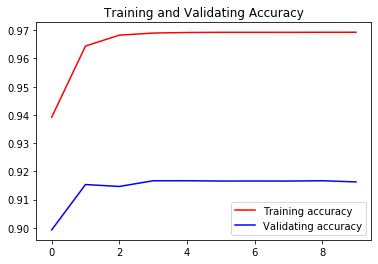

In [9]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()

In [10]:
model.evaluate(x_test, y_test, verbose = 2)

4000/1 - 0s - loss: 0.1875 - accuracy: 0.9167


[0.1880189619064331, 0.91666585]

In [11]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_8_3_model.h5')